In [69]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [19]:
md = pd.read_csv("md.csv")

Text(0, 0.5, 'Number of Users')

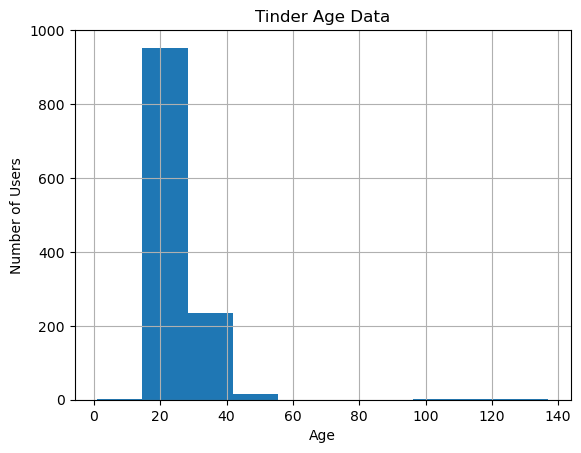

In [20]:
userage = md['age']
userage.hist()
plt.title("Tinder Age Data")
plt.xlabel("Age")
plt.ylabel("Number of Users")

Text(0, 0.5, 'Number of Users')

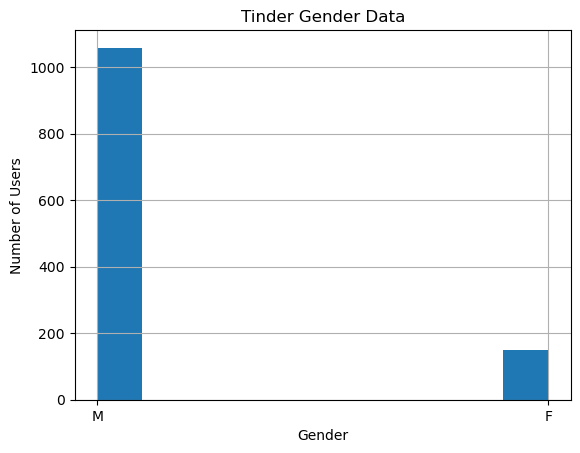

In [21]:
profilegender = md['gender']
profilegender.hist()
plt.title("Tinder Gender Data")
plt.xlabel("Gender")
plt.ylabel("Number of Users")

Text(0, 0.5, 'Number of Users')

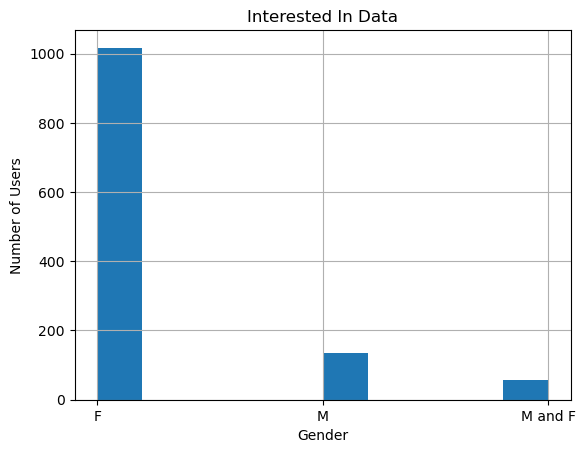

In [52]:
profilegender = md['interestedIn']
profilegender.hist()
plt.title("Interested In Data")
plt.xlabel("Gender")
plt.ylabel("Number of Users")

Text(0, 0.5, 'Number of Users')

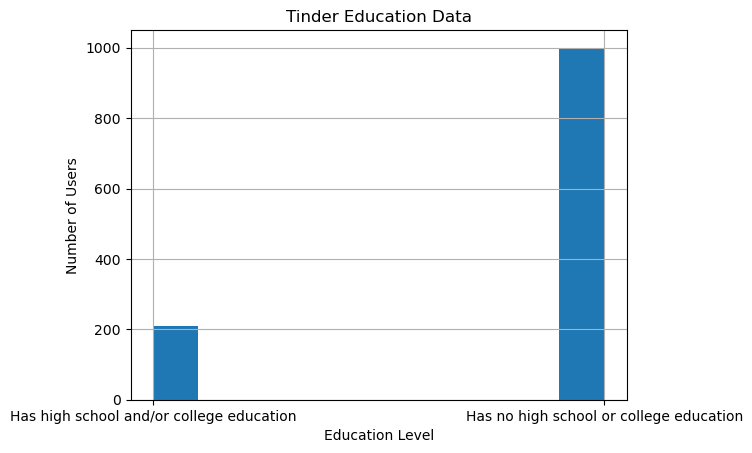

In [53]:
profilegender = md['education']
profilegender.hist()
plt.title("Tinder Education Data")
plt.xlabel("Education Level")
plt.ylabel("Number of Users")

Text(0, 0.5, 'Number of Users')

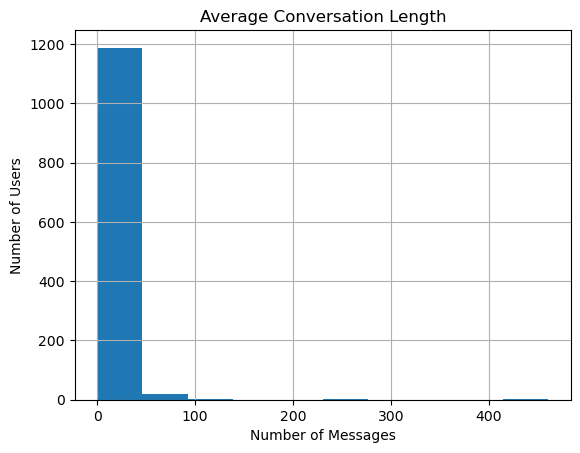

In [54]:
profilegender = md['averageConversationLength']
profilegender.hist()
plt.title("Average Conversation Length")
plt.xlabel("Number of Messages")
plt.ylabel("Number of Users")

Text(0, 0.5, 'Number of Users')

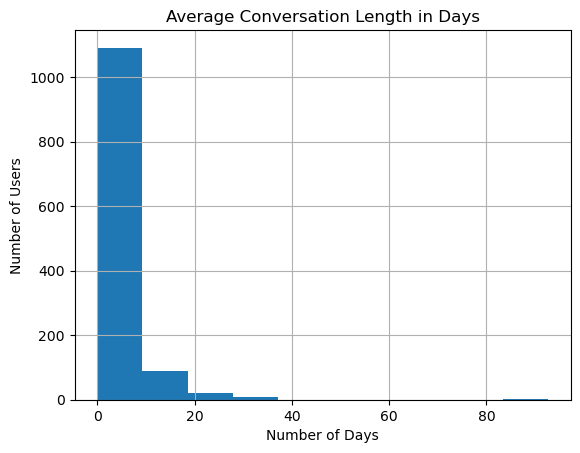

In [55]:
profilegender = md['averageConversationLengthInDays']
profilegender.hist()
plt.title("Average Conversation Length in Days")
plt.xlabel("Number of Days")
plt.ylabel("Number of Users")

Text(0, 0.5, 'Number of Users')

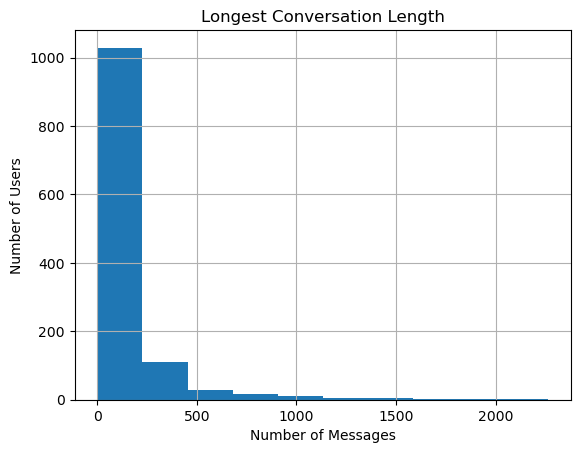

In [56]:
profilegender = md['longestConversation']
profilegender.hist()
plt.title("Longest Conversation Length")
plt.xlabel("Number of Messages")
plt.ylabel("Number of Users")

Text(0, 0.5, 'Number of Users')

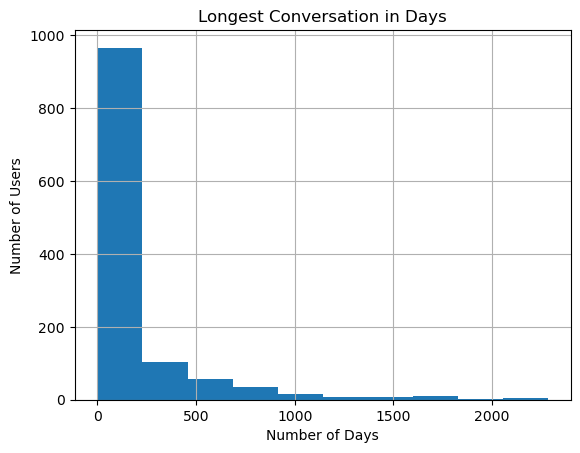

In [57]:
profilegender = md['longestConversationInDays']
profilegender.hist()
plt.title("Longest Conversation in Days")
plt.xlabel("Number of Days")
plt.ylabel("Number of Users")

Text(0, 0.5, 'Number of Users')

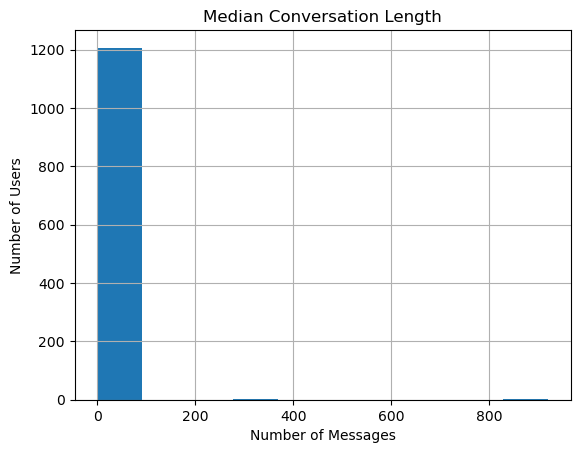

In [58]:
profilegender = md['medianConversationLength']
profilegender.hist()
plt.title("Median Conversation Length")
plt.xlabel("Number of Messages")
plt.ylabel("Number of Users")

Text(0, 0.5, 'Number of Users')

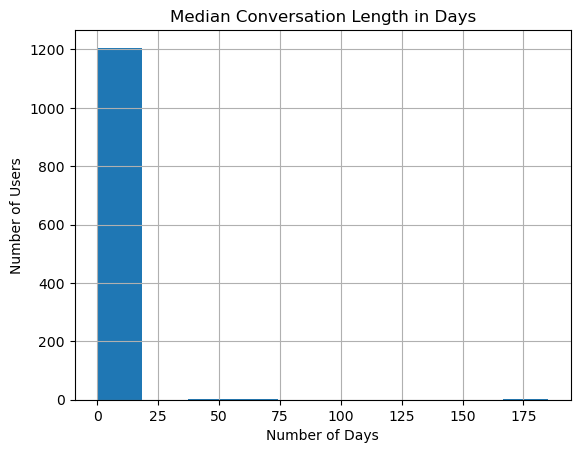

In [59]:
profilegender = md['medianConversationLengthInDays']
profilegender.hist()
plt.title("Median Conversation Length in Days")
plt.xlabel("Number of Days")
plt.ylabel("Number of Users")

Text(0, 0.5, 'Number of Users')

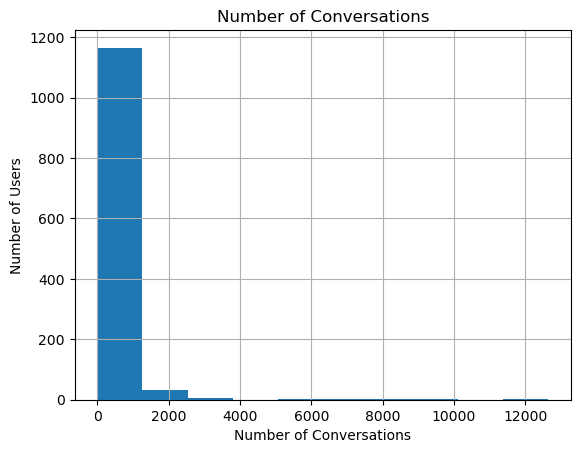

In [61]:
profilegender = md['nrOfConversations']
profilegender.hist()
plt.title("Number of Conversations")
plt.xlabel("Number of Conversations")
plt.ylabel("Number of Users")

Text(0, 0.5, 'Number of Users')

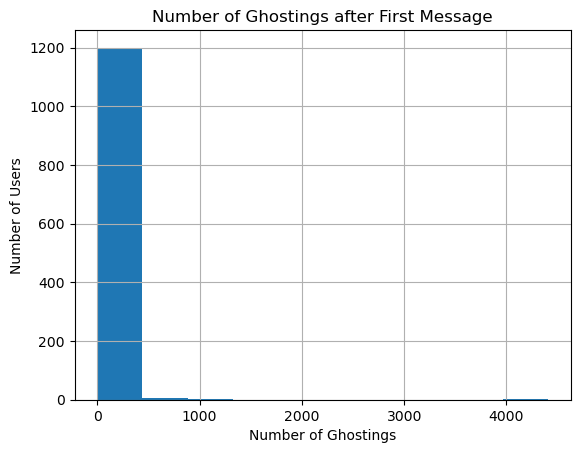

In [62]:
profilegender = md['nrOfGhostingsAfterInitialMessage']
profilegender.hist()
plt.title("Number of Ghostings after First Message")
plt.xlabel("Number of Ghostings")
plt.ylabel("Number of Users")

Text(0, 0.5, 'Number of Users')

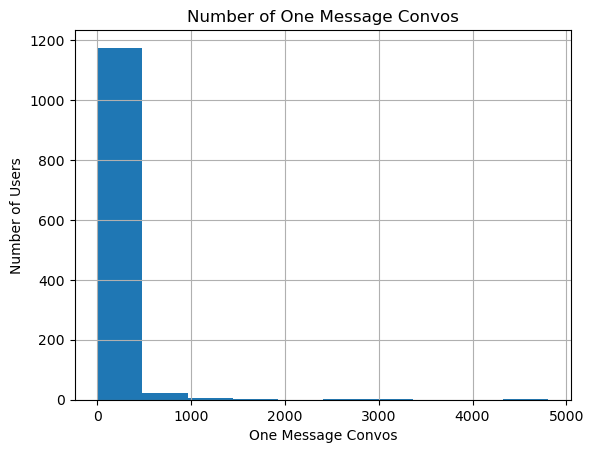

In [63]:
profilegender = md['nrOfOneMessageConversations']
profilegender.hist()
plt.title("Number of One Message Convos")
plt.xlabel("One Message Convos")
plt.ylabel("Number of Users")

Text(0, 0.5, 'Number of Users')

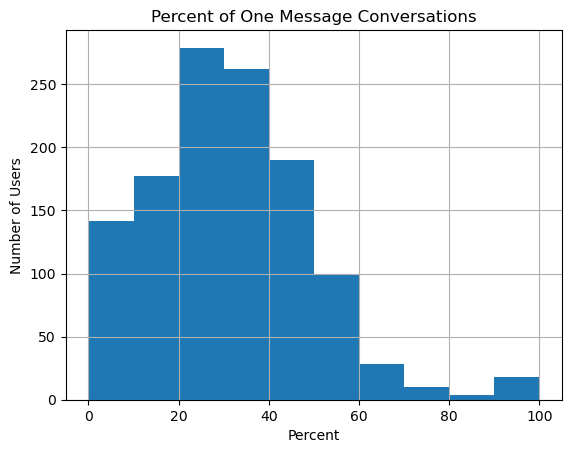

In [64]:
profilegender = md['percentOfOneMessageConversations']
profilegender.hist()
plt.title("Percent of One Message Conversations")
plt.xlabel("Percent")
plt.ylabel("Number of Users")

In [73]:
cm = pd.read_csv("cleanmessages_4.csv")
cm = cm.dropna(subset=['cleaned_content'])

In [75]:
# (Q1D)

# Bag of words model.

M = 100

vectorizer = CountVectorizer(binary=True, min_df=M)
xtrain = vectorizer.fit_transform(cm['cleaned_content'])

print(len(vectorizer.get_feature_names_out()))

11210


In [ ]:
# Train with L2 regularization
logregl2 = LogisticRegression(penalty='l2', max_iter=1000)
logregl2.fit(xtrain, ytrain)

# Calculates and predicts F1 score
trainpredl2 = logregl2.predict(xtrain)
devpredl2 = logregl2.predict(xdev)
f1trainl2 = f1_score(ytrain, trainpredl2)
f1devl2 = f1_score(ydev, devpredl2)

print(f"F1 Score (Training) with L2 regularization: {f1trainl2:.4f}")
print(f"F1 Score (Development) with L2 regularization: {f1devl2:.4f}")

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the new dataset
file_path = 'finale.csv'
data_new = pd.read_csv(file_path)

# Preprocessing the data
# Extracting the 'cleaned_messages' and 'averageConversationLength' columns
# Each list of messages is treated as a single document
X_new = data_new['message'].fillna("missingtext")
y_new = data_new['averageConversationLength']

# Convert 'averageConversationLength' to a binary variable (above/below median)
median_length_new = y_new.median()
y_binary_new = (y_new > median_length_new).astype(int)

# Split the dataset into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_binary_new, test_size=0.3, random_state=42)

# Vectorize the text data
vectorizer_new = CountVectorizer(stop_words='english', max_features=1000)
X_train_vectorized_new = vectorizer_new.fit_transform(X_train_new)
X_test_vectorized_new = vectorizer_new.transform(X_test_new)

# Fit the logistic regression model
model_new = LogisticRegression(max_iter=1000)
model_new.fit(X_train_vectorized_new, y_train_new)

# Predict and evaluate the model
y_pred_new = model_new.predict(X_test_vectorized_new)
mse_new = mean_squared_error(y_test_new, y_pred_new)

# Getting the feature names (words) and their coefficients
feature_names_new = vectorizer_new.get_feature_names_out()
coefficients_new = model_new.coef_[0]

# Sorting the coefficients and their corresponding words
sorted_indices_new = np.argsort(coefficients_new)
top_positive_words_new = [(feature_names_new[i], coefficients_new[i]) for i in sorted_indices_new[-20:]] # Words associated with longer conversations
top_negative_words_new = [(feature_names_new[i], coefficients_new[i]) for i in sorted_indices_new[:20]] # Words associated with shorter conversations

# Code output
print("MSE:", mse_new)
print("Top positive words:", top_positive_words_new)
print("Top negative words:", top_negative_words_new)


MSE: 0.3062483118753939
Top positive words: [('moi', 2.1882154188668332), ('mutta', 2.204578208120097), ('hamburg', 2.2795368535661225), ('idziemy', 2.287853828420168), ('ola', 2.343772619530981), ('nid', 2.4044837697189885), ('isch', 2.519952705408239), ('moikka', 2.5212432537973095), ('ir', 2.5232336719008215), ('fuer', 2.6466333507908444), ('marco', 2.893319392810562), ('buttercup', 2.9697939506213906), ('lparcolon', 3.0748041916429782), ('aesthetically', 3.3458145296861908), ('aloha', 3.374883813257204), ('aside', 3.388895296316886), ('serwus', 3.4106357449446354), ('buna', 3.4362404234403705), ('czoem', 3.599333563184825), ('sali', 4.048019856575363)]
Top negative words: [('hoppas', -3.745164049454051), ('trouble', -3.6719242248688806), ('fell', -3.6287120451870614), ('allo', -3.47822867853838), ('associate', -3.2164700730563514), ('milan', -2.9403029795853097), ('gusta', -2.9100591109183225), ('luce', -2.871949692739046), ('munich', -2.7122580355597394), ('bowtienye', -2.68708352